# Отчет по задержкам во внутренних авиаперелетах в США, 2015 год

### Необходимые импорты и загрузка и подготовка датасета

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('flights.csv', dtype=str)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_airports = pd.read_csv('airports.csv')
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [145]:
df_airlines = pd.read_csv('airlines.csv')
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [12]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]
df = df.dropna(subset=["ARRIVAL_DELAY"])
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,0753,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,0430,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,0432,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,0330,-10,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Мы будем изучать задержки; несложно заметить (по коэффициенту корреляции), что в качестве показателя задержки достаточно взять столбец  'ARRIVAL_DELAY', поэтому можно обойтись без анализа столбца "DEPARTURE_DELAY".

Также, я заметил, что столбцы 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY", дающие информацию о причинах задержек, заполнены только для 'ARRIVAL_DELAY'>=15 минут, поэтому я предлагаю разделить датасет рейсов с задержками на две части: с короткими задержками до 15 минут и долгими более 15 минут, где будут прописаны и причины задержек. Можно заметить, что датасет будет в итоге разбит на досточно равные по количеству записей части, и для каждого из двух видов задержек можно будет найти свои интересные закононмерности

In [72]:
df_delayed[["DEPARTURE_DELAY", 'ARRIVAL_DELAY']].astype(int).corr()

,DEPARTURE_DELAY,ARRIVAL_DELAY
DEPARTURE_DELAY,1.000000,0.960092
ARRIVAL_DELAY,0.960092,1.000000


In [23]:
#df[["MONTH", "DAY", "DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int)
df_delayed=df.loc[df['ARRIVAL_DELAY'].astype(int) > 0]

In [53]:
df_delayed

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,0025,...,0610,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,2015,1,1,4,DL,2440,N651DL,SEA,MSP,0040,...,0557,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,0055,...,0543,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,0100,...,0939,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819057,2015,12,31,4,NK,371,N661NK,FLL,BQN,2358,...,0346,28,0,0,NaN,15,0,13,0,0
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,...,1020,159,0,0,NaN,0,0,159,0,0
5819071,2015,12,31,4,B6,802,N589JB,SLC,MCO,2359,...,0625,17,0,0,NaN,1,0,16,0,0
5819073,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,...,0549,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_smalldelay = df.loc[(df['ARRIVAL_DELAY'].astype(int) > 0)&(df['ARRIVAL_DELAY'].astype(int) < 15)]
df_smalldelay 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,0025,...,0610,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,2015,1,1,4,DL,2440,N651DL,SEA,MSP,0040,...,0557,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,0055,...,0543,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,0100,...,0939,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819033,2015,12,31,4,DL,1354,N1607B,LAX,ATL,2350,...,0705,11,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819034,2015,12,31,4,UA,235,N81449,HNL,SFO,2350,...,0710,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819038,2015,12,31,4,AS,660,N407AS,SEA,DFW,2350,...,0536,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819073,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,...,0549,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_bigdelay = df.loc[(df['ARRIVAL_DELAY'].astype(int) > 14)]
df_bigdelay

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,0115,...,0607,25,0,0,NaN,25,0,0,0,0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,0125,...,0632,43,0,0,NaN,43,0,0,0,0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,0145,...,0610,15,0,0,NaN,0,0,15,0,0
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,0307,...,0520,20,0,0,NaN,20,0,0,0,0
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,0400,...,0730,85,0,0,NaN,0,0,85,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,2015,12,31,4,B6,1029,N328JB,MCO,BQN,2342,...,0345,20,0,0,NaN,0,0,17,3,0
5819051,2015,12,31,4,AS,28,N477AS,SEA,MSP,2355,...,0535,28,0,0,NaN,12,0,16,0,0
5819057,2015,12,31,4,NK,371,N661NK,FLL,BQN,2358,...,0346,28,0,0,NaN,15,0,13,0,0
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,...,1020,159,0,0,NaN,0,0,159,0,0


###  Среднее время задержек по месяцам 

In [101]:
print("Все задержки")
print(df_delayed[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']))
print("Короткие задержки")
print(df_smalldelay[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']))
print("Долгие задержки")
print(df_bigdelay[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']))


Все задержки
      ARRIVAL_DELAY
               mean
MONTH              
1         32.755759
2         35.084894
3         31.764549
4         30.157083
5         34.111806
6         38.423327
7         34.889674
8         34.050207
9         28.015738
10        26.959795
11        30.351220
12        36.718654
Короткие задержки
      ARRIVAL_DELAY
               mean
MONTH              
1          6.402609
2          6.476166
3          6.343184
4          6.277360
5          6.293232
6          6.382522
7          6.315094
8          6.256252
9          6.086996
10         6.071639
11         6.275701
12         6.422258
Долгие задержки
      ARRIVAL_DELAY
               mean
MONTH              
1         56.694167
2         59.210498
3         56.980577
4         56.163848
5         60.654348
6         63.683192
7         59.339236
8         59.677951
9         54.804066
10        55.181178
11        57.257287
12        62.616418


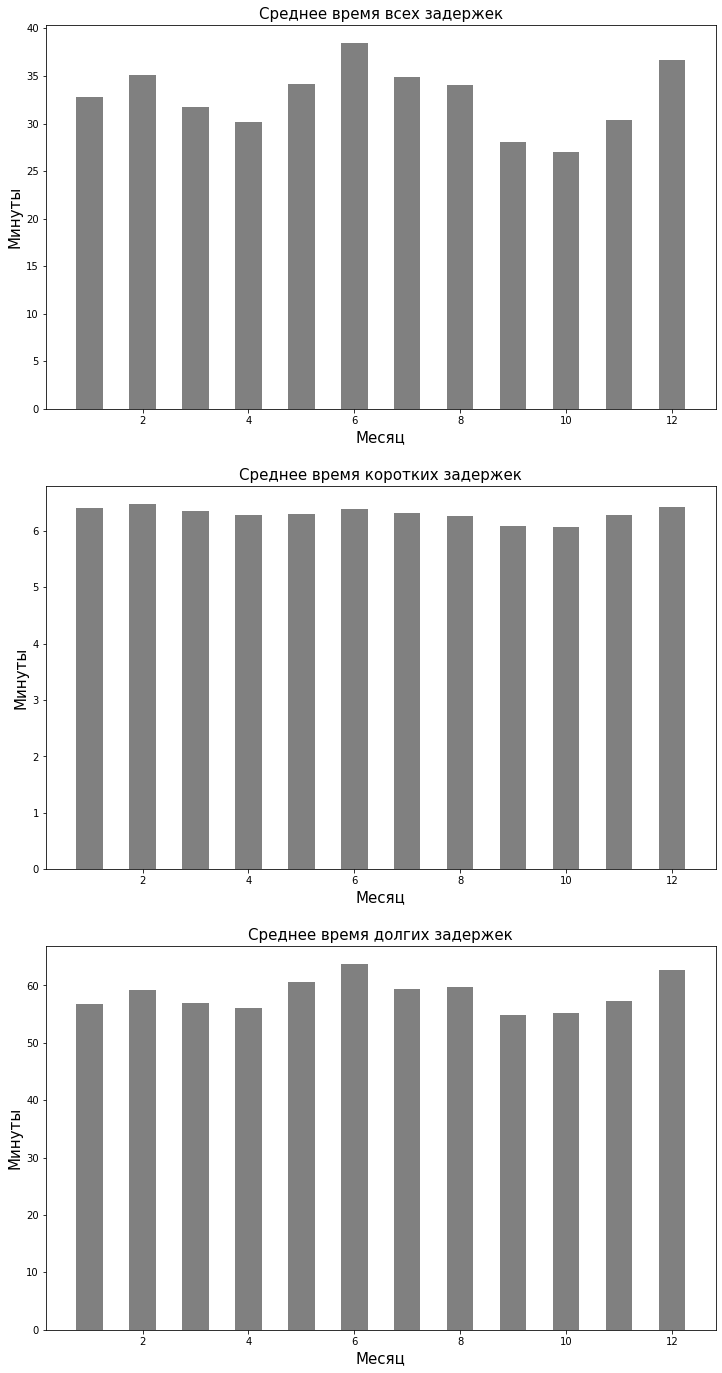

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 24))
width = 0.5 
ax1.bar(range(1,13), df_delayed[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']).ARRIVAL_DELAY['mean'], width, color='gray')


ax1.set_ylabel('Минуты', fontsize=15)
ax1.set_xlabel('Месяц', fontsize=15)
ax1.set_title('Среднее время всех задержек', fontsize=15)
ax2.bar(range(1,13), df_smalldelay[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']).ARRIVAL_DELAY['mean'], width, color='gray')


ax2.set_ylabel('Минуты', fontsize=15)
ax2.set_xlabel('Месяц', fontsize=15)
ax2.set_title('Среднее время коротких задержек', fontsize=15)

ax3.bar(range(1,13), df_bigdelay[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']).ARRIVAL_DELAY['mean'], width, color='gray')


ax3.set_ylabel('Минуты', fontsize=15)
ax3.set_xlabel('Месяц', fontsize=15)
ax3.set_title('Среднее время долгих задержек', fontsize=15)


plt.show()

Вывод: на первом графике видно, что в летние (особенно) и зимние месяцы самое длинное среднее время всех задержек, в осенние - самое короткое, в весенние - где-то посередине. Среднее время коротких задержек практически одинаково во все месяцы (6-6,5 минут). Среднее время долгих задержек имеет схожее с первым случаем распределение по месяцам, но с не настолько ярко выраженной разницей между разными месяцами

### Среднее время задержек по дням недели

In [103]:
print("Все задержки")
print(df_delayed[["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']))
print("Короткие задержки")
print(df_smalldelay[["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']))
print("Долгие задержки")
print(df_bigdelay[["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']))

Все задержки
            ARRIVAL_DELAY
                     mean
DAY_OF_WEEK              
1               36.087933
2               33.807593
3               31.911584
4               32.725986
5               31.435189
6               32.083382
7               33.576126
Короткие задержки
            ARRIVAL_DELAY
                     mean
DAY_OF_WEEK              
1                6.284698
2                6.289830
3                6.285297
4                6.357556
5                6.339850
6                6.221227
7                6.319867
Долгие задержки
            ARRIVAL_DELAY
                     mean
DAY_OF_WEEK              
1               62.744608
2               60.015749
3               57.050884
4               57.892808
5               56.459438
6               58.894312
7               59.334699


Первая и третья таблица показывают, что самое высокое среднее время задержек (всех и больших) - в понедельник. Так же в первую тройку входит вторник и воскресенье. Для коротких задержек никакие дни недели не выделяются

### Среднее время задержек по изначально запланированному времени отправления

In [106]:
df_delayed['SCHEDULED_DEPARTURE_HOUR']=df_delayed['SCHEDULED_DEPARTURE'].apply(lambda x: int(x[0:2]))
df_smalldelay['SCHEDULED_DEPARTURE_HOUR']=df_smalldelay['SCHEDULED_DEPARTURE'].apply(lambda x: int(x[0:2]))
df_bigdelay['SCHEDULED_DEPARTURE_HOUR']=df_bigdelay['SCHEDULED_DEPARTURE'].apply(lambda x: int(x[0:2]))

<ipython-input-106-1d60ea11af16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delayed['SCHEDULED_DEPARTURE_HOUR']=df_delayed['SCHEDULED_DEPARTURE'].apply(lambda x: int(x[0:2]))
<ipython-input-106-1d60ea11af16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smalldelay['SCHEDULED_DEPARTURE_HOUR']=df_smalldelay['SCHEDULED_DEPARTURE'].apply(lambda x: int(x[0:2]))
<ipython-input-106-1d60ea11af16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [108]:
print("Все задержки")
print(df_delayed[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']))
print("Короткие задержки")
print(df_smalldelay[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']))
print("Долгие задержки")
print(df_bigdelay[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']))

Все задержки
                         ARRIVAL_DELAY
                                  mean
SCHEDULED_DEPARTURE_HOUR              
0                            28.433484
1                            32.349974
2                            33.313402
3                            39.254167
4                            34.880435
5                            28.725749
6                            27.438002
7                            27.452530
8                            28.661782
9                            28.263487
10                           29.514070
11                           30.194839
12                           31.839647
13                           32.071458
14                           33.612264
15                           34.972638
16                           36.039908
17                           37.443922
18                           38.440757
19                           37.618136
20                           37.752514
21                           35.302806
22          

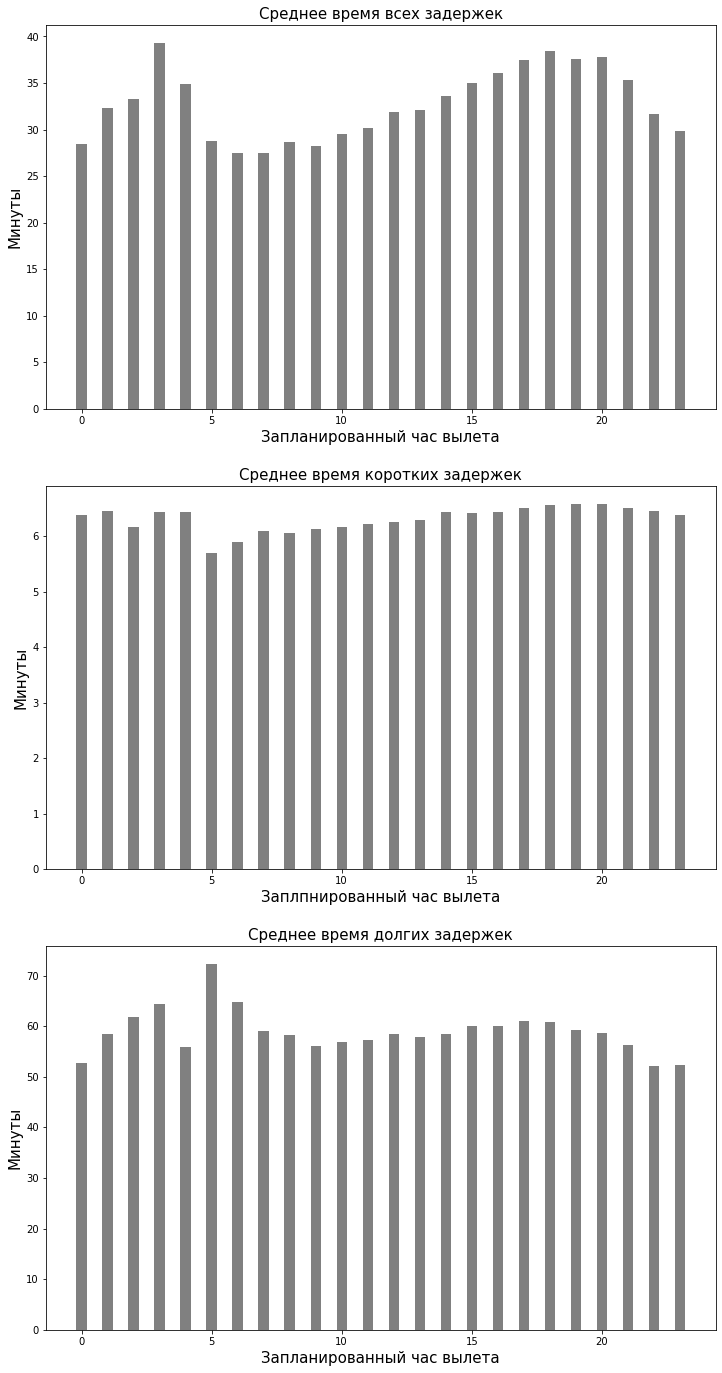

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 24))
width = 0.4 
ax1.bar(range(0, 24), df_delayed[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']).ARRIVAL_DELAY['mean'], width, color='gray')


ax1.set_ylabel('Минуты', fontsize=15)
ax1.set_xlabel('Запланированный час вылета', fontsize=15)
ax1.set_title('Среднее время всех задержек', fontsize=15)
ax2.bar(range(0, 24), df_smalldelay[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']).ARRIVAL_DELAY['mean'], width, color='gray')


ax2.set_ylabel('Минуты', fontsize=15)
ax2.set_xlabel('Заплпнированный час вылета', fontsize=15)
ax2.set_title('Среднее время коротких задержек', fontsize=15)

ax3.bar(range(0, 24), df_bigdelay[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']).ARRIVAL_DELAY['mean'], width, color='gray')


ax3.set_ylabel('Минуты', fontsize=15)
ax3.set_xlabel('Запланированный час вылета', fontsize=15)
ax3.set_title('Среднее время долгих задержек', fontsize=15)


plt.show()

Для всех задержек: в среднем, самые длинные задержки наблюдаются для рейсов в районе 3-4 утра и 18-20 вечера, самые короткие - в 6-7 утра и час ночи, на графике также видно, что между максимумами и минимумами среднее время имеет свойство монотонно расти или убывать;

Для коротких задержек: в отличие от первого графика, здесь нет особо выделяющихся периодов, но полученное распределение похоже на распределение из первого графика, только с гораздо меньшим отклонением.

Для длинных задержек: полученное распределение похоже на первое, только здесь утренний пик сдвинут на 2 часа правее, а вечерний пик почти не выражен. Необычно выглядит провал графика в 4 часа ночи

### Среднее время задержек по аэропортам отправления

In [117]:
df_airports = df_airports.rename(columns={'IATA_CODE': 'ORIGIN_AIRPORT'})
df_delayed=df_delayed.merge(df_airports[["ORIGIN_AIRPORT", "AIRPORT", "CITY", "STATE"]], on='ORIGIN_AIRPORT')
df_smalldelay=df_smalldelay.merge(df_airports[["ORIGIN_AIRPORT", "AIRPORT", "CITY", "STATE"]], on='ORIGIN_AIRPORT')
df_bigdelay=df_bigdelay.merge(df_airports[["ORIGIN_AIRPORT", "AIRPORT", "CITY", "STATE"]], on='ORIGIN_AIRPORT')


In [122]:
df_delayed.ARRIVAL_DELAY = df_delayed.ARRIVAL_DELAY.astype(int)
df_bigdelay.ARRIVAL_DELAY=df_bigdelay.ARRIVAL_DELAY.astype(int)
df_smalldelay.ARRIVAL_DELAY = df_smalldelay.ARRIVAL_DELAY.astype(int)

In [130]:
print("Все задержки")
print("Худшие 10")
print(df_delayed[["AIRPORT", 'ARRIVAL_DELAY']].groupby(by="AIRPORT").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False).head(10))
print("Лучшие 10")
print(df_delayed[["AIRPORT", 'ARRIVAL_DELAY']].groupby(by="AIRPORT").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False).tail(10))
print("Короткие задержки")
print("Худшие 10")
print(df_smalldelay[["AIRPORT", 'ARRIVAL_DELAY']].groupby(by="AIRPORT").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False).head(10))
print("Лучшие 10")
print(df_smalldelay[["AIRPORT", 'ARRIVAL_DELAY']].groupby(by="AIRPORT").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False).tail(10))
print("Долгие задержки")
print("Худшие 10")
print(df_bigdelay[["AIRPORT", 'ARRIVAL_DELAY']].groupby(by="AIRPORT").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False).head(10))
print("Лучшие 10")
print(df_bigdelay[["AIRPORT", 'ARRIVAL_DELAY']].groupby(by="AIRPORT").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False).tail(10))

Все задержки
Худшие 10
                                               ARRIVAL_DELAY
                                                        mean
AIRPORT                                                     
Barnstable Municipal Airport                       88.047619
Martha's Vineyard Airport                          68.400000
Greater Binghamton Airport                         62.342857
Valdez Airport                                     61.173913
Del Norte County Airport (Jack McNamara Field)     60.728814
Wilmington Airport                                 57.207547
Nantucket Memorial Airport                         56.061728
Eagle County Regional Airport                      55.163441
Columbia Regional Airport                          54.221030
Sioux Gateway Airport                              53.576720
Лучшие 10
                                      ARRIVAL_DELAY
                                               mean
AIRPORT                                            
Canyonlands Field 

Получены три рейтинга аэропортов по среднему времени задержек. Из интересного было замечено, что в Valdez Airport очень большое среднее время долгих задержек, но зато там отличная ситуация с короткими задержками. В аэропорте King Salmon Airport диаметрально противоположная ситуация: там самые короткие долгие задержки, но плохая ситуация с задержками коротких рейсов. Интересно, что эти два аэропорта расположены в Аляске. Также весьма проблемным выглядит аэропорт Barnstable Municipal Airport 

### Среднее время задержек по штатам

In [136]:
print("Все задержки")
print(df_delayed[["STATE", 'ARRIVAL_DELAY']].groupby(by="STATE").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False))
print("Короткие задержки")
print(df_smalldelay[["STATE", 'ARRIVAL_DELAY']].groupby(by="STATE").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False))
print("Долгие задержки")
print(df_bigdelay[["STATE", 'ARRIVAL_DELAY']].groupby(by="STATE").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False))

Все задержки
      ARRIVAL_DELAY
               mean
STATE              
DE        57.207547
VI        43.152414
VT        43.052682
IA        42.671410
NY        41.491130
ME        41.312500
AR        40.304208
NJ        39.938677
KS        39.406798
WY        39.217490
VA        38.799561
KY        38.414612
AS        38.358209
IN        38.252387
IL        38.031682
OH        38.014482
MS        37.327388
PA        37.229285
SC        37.206685
SD        37.116359
ND        37.096744
WV        37.002904
PR        36.879773
FL        36.680226
OK        36.305859
MI        35.927444
LA        35.926820
WI        35.660034
MA        35.642956
NH        35.457369
NE        35.085142
TN        34.892118
AL        34.768800
CT        34.367071
MD        34.148375
RI        33.889900
CO        33.588620
MO        33.166866
NM        33.068298
ID        32.990485
TX        32.822266
GU        31.867647
NV        31.624617
NC        31.255238
GA        31.254630
MT        30.828186
MN     

Получен рейтинг штатов по среднему времени задержек, достаочно серьезные проблемы наблюдаются в Делавре (DE), особенно хорошая ситуация - в Гавайях (HI) и Гуаме (GU)

### Среднее время задержек по авиакомпаниям

In [147]:

df_airlines = df_airlines.rename(columns={'AIRLINE': 'AIRLINE2'})
df_airlines = df_airlines.rename(columns={'IATA_CODE': 'AIRLINE'})

df_airlines

,AIRLINE,AIRLINE2
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [148]:
df_smalldelay=df_smalldelay.merge(df_airlines, on='AIRLINE')
df_bigdelay=df_bigdelay.merge(df_airlines, on='AIRLINE')
df_delayed=df_delayed.merge(df_airlines, on='AIRLINE')

In [150]:
print("Все задержки")
print(df_delayed[["AIRLINE2", 'ARRIVAL_DELAY']].groupby(by="AIRLINE2").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False))
print("Короткие задержки")
print(df_smalldelay[["AIRLINE2", 'ARRIVAL_DELAY']].groupby(by="AIRLINE2").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False))
print("Долгие задержки")
print(df_bigdelay[["AIRLINE2", 'ARRIVAL_DELAY']].groupby(by="AIRLINE2").agg(['mean']).sort_values(by=('ARRIVAL_DELAY', "mean"), ascending=False))

Все задержки
                             ARRIVAL_DELAY
                                      mean
AIRLINE2                                  
Frontier Airlines Inc.           42.062584
Spirit Air Lines                 41.449975
American Eagle Airlines Inc.     39.743376
United Air Lines Inc.            39.658034
JetBlue Airways                  38.897633
Atlantic Southeast Airlines      35.700212
American Airlines Inc.           34.612147
Skywest Airlines Inc.            33.003606
Delta Air Lines Inc.             32.581496
Virgin America                   30.858029
Southwest Airlines Co.           29.822739
US Airways Inc.                  27.419925
Alaska Airlines Inc.             22.806295
Hawaiian Airlines Inc.           15.515501
Короткие задержки
                             ARRIVAL_DELAY
                                      mean
AIRLINE2                                  
Spirit Air Lines                  6.646113
JetBlue Airways                   6.528936
Frontier Airlines Inc. 

Получен рейтинг авиаперевозчиков по задержкам, лучшая ситуация по задержкам у авиакомпаний Alaska Airlines Inc. и Hawaiian Airlines Inc., худшая - у Frontier Airlines Inc., Spirit Air Lines и  United Air Lines Inc.  

Мы собрали средние показатели по некоторым основным критериям, попытались выявить наиболее проблемные времена года, суток, аэропорты, авиакомпании и т. д. Предлагаю дальше найти какие именно причины привели к длительным задержкам в некоторых проблемных моментах

### Наиболее распространенные причины долгих задержек в общем случае

In [171]:
df_reasons = df_bigdelay[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int)
df_reasons

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,25,0,0,0,0
1,32,0,0,0,0
2,15,0,0,0,0
3,27,0,0,0,0
4,96,0,0,0,0
...,...,...,...,...,...
1003355,0,0,20,12,14
1003356,0,0,0,193,10
1003357,0,0,19,0,0
1003358,0,0,0,42,0


In [167]:
df_reasons.sum()

AIR_SYSTEM_DELAY       13533065
SECURITY_DELAY            77945
AIRLINE_DELAY          18966945
LATE_AIRCRAFT_DELAY    23767674
WEATHER_DELAY           2991008
dtype: int64

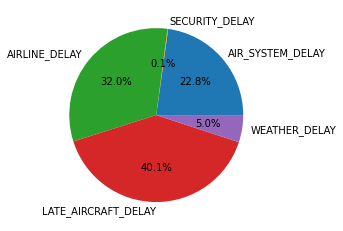

In [169]:

plt.pie(df_reasons.sum(), labels=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], autopct='%1.1f%%') 
plt.show()

Вывод: в общем случае, преобладают задержки, вызванные проблемами с самолетом или авиакомпанией, задержки, вызванные проблемами безопасности - крайне редки

### Проблемные аэропорты

Barnstable Municipal Airport    

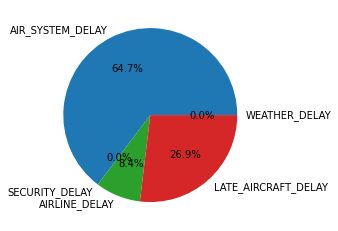

In [177]:
plt.pie(df_bigdelay.loc[df_bigdelay["AIRPORT"]=='Barnstable Municipal Airport'][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int).sum(), labels=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], autopct='%1.1f%%') 
plt.show()



Вывод: этот аэропорт больше всего страдал от air_system_delay

Valdez Airport 

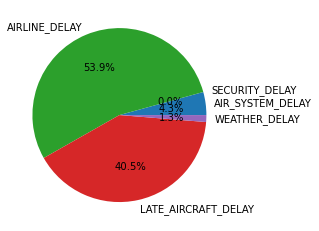

In [178]:
plt.pie(df_bigdelay.loc[df_bigdelay["AIRPORT"]=='Valdez Airport'][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int).sum(), labels=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], autopct='%1.1f%%') 
plt.show()

А этот аэропорт - от проблем c авиаперевозчиком и опозданием самолетов

### Проблемные штаты

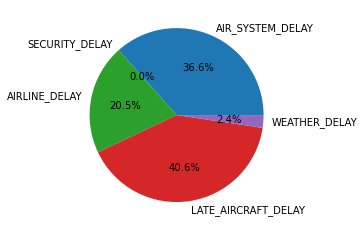

In [182]:
plt.pie(df_bigdelay.loc[df_bigdelay["STATE"]=='DE'][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int).sum(), labels=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], autopct='%1.1f%%') 
plt.show()

В Делавэре - проблемы с самолетом и AIR_SYSTEM

### Проблемные авиакомпании

 Frontier Airlines Inc

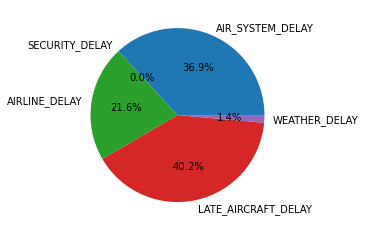

In [189]:
plt.pie(df_bigdelay.loc[df_bigdelay["AIRLINE"]=='F9'][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int).sum(), labels=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], autopct='%1.1f%%') 
plt.show()

Spirit Air Lines

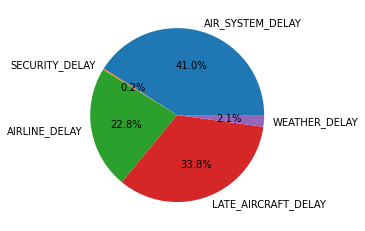

In [190]:
plt.pie(df_bigdelay.loc[df_bigdelay["AIRLINE"]=='NK'][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int).sum(), labels=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], autopct='%1.1f%%') 
plt.show()

United Air Lines Inc. 

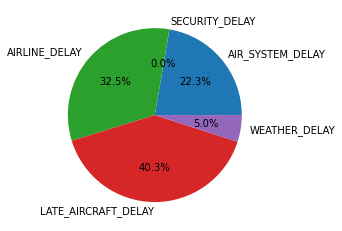

In [191]:
plt.pie(df_bigdelay.loc[df_bigdelay["AIRLINE"]=='UA'][['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]].astype(int).sum(), labels=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"], autopct='%1.1f%%') 
plt.show()

Вывод: у 3-й компании заметно больше задержек по причинам, связанной с самой авиакомпанией, у первых двух больше задержек, связанных с факторами, напрямую не зависящими от самого авиаперевозчика